<a href="https://colab.research.google.com/github/sa21262/datascience22/blob/main/lab2%20-%20bootstrap/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [29]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math




In [30]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1] # converted to numpy array 
print (type(data))
print (data)
print (data.shape[0])



<class 'numpy.ndarray'>
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
14


In [31]:
from os import X_OK
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps): #(data , 14 , 50) is passed 
	# <---INSERT YOUR CODE HERE--->
	samples1=np.random.choice(x, size=(n_bootstraps,sample_size)) #it gives me outputs = sample size and this process repeats n_bootstrap times 
	
	bootstrap_mean=np.mean(samples1,axis=1)
	data_mean= np.mean(bootstrap_mean)
	#bootstrap_mean=np.sort(bootstrap_mean) # percentile sorts auto 
	upper = np.percentile(bootstrap_mean, 97.5)
	lower = np.percentile(bootstrap_mean, 2.5)
	return data_mean, lower, upper


[[100, 9.257142857142856, 'mean'], [100, 6.707142857142857, 'lower'], [100, 12.428571428571429, 'upper'], [1100, 9.234935064935065, 'mean'], [1100, 6.357142857142857, 'lower'], [1100, 12.357142857142858, 'upper'], [2100, 9.218673469387754, 'mean'], [2100, 6.5, 'lower'], [2100, 12.357142857142858, 'upper'], [3100, 9.286866359447004, 'mean'], [3100, 6.571428571428571, 'lower'], [3100, 12.537500000000007, 'upper'], [4100, 9.219407665505226, 'mean'], [4100, 6.357142857142857, 'lower'], [4100, 12.357142857142858, 'upper'], [5100, 9.205728291316527, 'mean'], [5100, 6.428571428571429, 'lower'], [5100, 12.428571428571429, 'upper'], [6100, 9.218583138173303, 'mean'], [6100, 6.428571428571429, 'lower'], [6100, 12.323214285714261, 'upper'], [7100, 9.174215291750503, 'mean'], [7100, 6.428571428571429, 'lower'], [7100, 12.357142857142858, 'upper'], [8100, 9.190952380952382, 'mean'], [8100, 6.5, 'lower'], [8100, 12.357142857142858, 'upper'], [9100, 9.177095761381477, 'mean'], [9100, 6.42857142857142

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

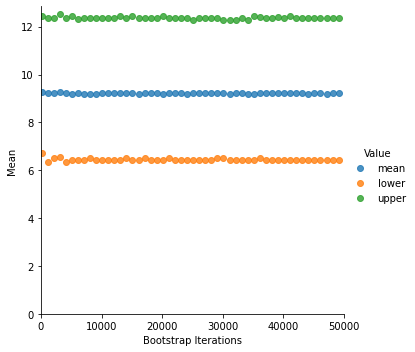

In [32]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000): #each time this loop runs it appends list with three lists as below  
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"]) # as function returns three parameters all together  boot[0] is data_mean 
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])
print (boots)
df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)


In [22]:
df_boot

,Bootstrap Iterations,Mean,Value
0,100,9.167143,mean
1,100,6.928571,lower
2,100,12.837500,upper
3,1100,9.256753,mean
4,1100,6.500000,lower
...,...,...,...
145,48100,6.428571,lower
146,48100,12.428571,upper
147,49100,9.224425,mean
148,49100,6.428571,lower



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [24]:
def bootstrap_mean_ci(x, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	samples1=np.random.choice(x, size=(n_bootstraps,sample_size)) #it gives me outputs = sample size and this process repeats n_bootstrap times 
	
	bootstrap_mean=np.mean(samples1,axis=1)
	data_mean= np.mean(bootstrap_mean)
	#bootstrap_mean=np.sort(bootstrap_mean) # percentile sorts auto
	upper_percentile = ((100-ci)/2)+ci
	lower_percentile = ((100-ci)/2) 
	upper = np.percentile(bootstrap_mean, upper_percentile)
	lower = np.percentile(bootstrap_mean, lower_percentile)
	return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

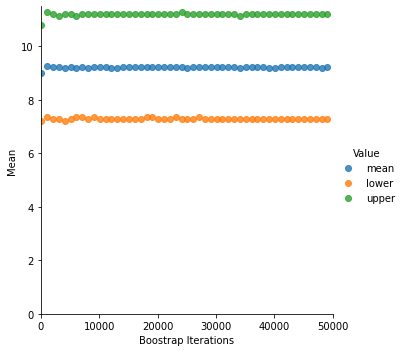

In [25]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"]) # creating a dataframe using three attribute of each element of the list 
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


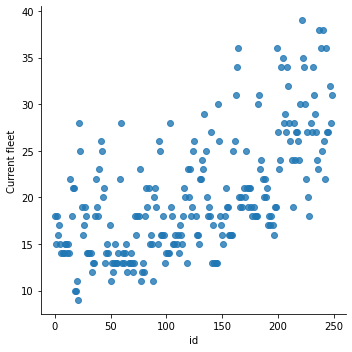

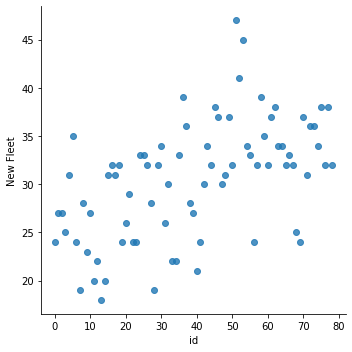

In [26]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
df1=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv') # loading a vehicle data set 

df1['id'] = np.arange(len(df1)) #adding a column to vehichle data set of len(df1) means according to lenght of each unequal column 

sns.lmplot('id', 'Current fleet', data=df1, fit_reg=False) #plotting Current fleet against id 
sns.lmplot('id', 'New Fleet', data=df1, fit_reg=False)

#data1=df1['Current fleet'].values
#x = np.arange(250) # creates a array containing numbers from 0 to 249
#plt.scatter(np.arange(250),data1 ) # way of plotting using matplotlib.pyplot 
#plt.xlabel('ID')
#plt.ylabel('Current fleet')
#data2=df1['New Fleet'].values
# Note: you can add more cells as needed to organise your code and your plots


In [ ]:

#df1.tail() # prints last five values of data

In [ ]:
#df1.head() # prints first five values of data

In [ ]:
#df1

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [55]:
from numpy.core.numeric import NaN
# <---INSERT YOUR CODE HERE--->

'''mean_current_fleet=df1['Current fleet'].mean()# mean of current fleet 

mean_New_Fleet=df1['New Fleet'].mean()# mean of new fleet 

print (mean_current_fleet)

print (mean_New_Fleet)'''
def no_nan_data(sample):
  store_if_nonan = []
  for i in sample:
    if math.isnan(i) == False:
      store_if_nonan.append(i)
  data_len = len(store_if_nonan)
  no_nan_array = np.array(store_if_nonan)
  #print(len(no_nan_array))
  return no_nan_array

no_nan_data_current = no_nan_data(df1['Current fleet'].values)
no_nan_data_new = no_nan_data(df1['New Fleet'].values)
#no_nan_data_new = df1[~df1['New Fleet'].isnull()]
#no_nan_data_new=df1[df1['New Fleet'].notnull()]

#nans_indices = df1.columns[df1.isna().any()].tolist() # to check which column cotain nans values 


mean_current_fleet=df1['Current fleet'].mean()# mean of current fleet # mean of current fleet with respect to 250 values using df function 
mean_New_Fleet=df1['New Fleet'].mean()# mean of new fleet # mean of new fleet with respect to 80 values




print (mean_current_fleet)
print (mean_New_Fleet)
tobs = mean_New_Fleet - mean_current_fleet

print('our observation is tobs=',tobs)
print (no_nan_data_new)




a=bootstrap_mean_ci(no_nan_data_current, len(no_nan_data_current), 10, 95)
b=bootstrap_mean_ci(no_nan_data_new, len(no_nan_data_new), 10, 95)

print(a)
print(b)

20.14457831325301
30.481012658227847
our observation is tobs= 10.336434344974837
[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32.]
    Current fleet  New Fleet  id
0              18       24.0   0
1              15       27.0   1
2              18       27.0   2
3              16       25.0   3
4              17       31.0   4
..            ...        ...  ..
74             18       34.0  74
75             18       38.0  75
76             23       32.0  76
77             11       38.0  77
78             12       32.0  78

[79 rows x 3 columns]
(20.252208835341364, 19.605220883534137, 21.154819277108437)
(30.627848101265823, 29.57753164556962, 31.33417721518987)


In [28]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):

def permut_test(sample1, sample2, n_permutations):

    concat = np.concatenate((sample1, sample2))
    #((no_nan_data_current, no_nan_data_new))
    keep_in=[]
    for i in range(n_permutations):
      perm = np.random.permutation(concat)
      p_current = perm[:int(len(sample1))]
      p_new = perm[len(sample2):]
      mean_of_p_current = np.mean(p_current)
      #print('1',mean_of_p_current)
      mean_of_p_new = np.mean(p_new)
     # print(mean_of_p_new)
      tperm = mean_of_p_new - mean_of_p_current
      
      if tperm > 0:
        keep_in.append(tperm)
        
        
    keep_in_array = np.array(keep_in)
    count=0
    for j in keep_in_array:
      if j > tobs:
        count=count+1

    p=count/n_permutations   
    print(keep_in)
    return p

permut_test(no_nan_data_current, no_nan_data_new, 10000)

    

[0.7068273092369459, 0.546184738955823, 0.8353413654618471, 0.08433734939759319, 0.18875502008032186, 0.07228915662650692, 0.7068273092369495, 0.02008032128514259, 0.19678714859437818, 0.5421686746987966, 0.08433734939759319, 0.43373493975903443, 0.02811244979919536, 0.7068273092369459, 0.43373493975903443, 0.3694779116465874, 0.16465863453814933, 0.05622489959839427, 0.04819277108433795, 0.048192771084334396, 0.36546184738955745, 0.7991967871485954, 0.477911646586346, 0.23694779116465625, 0.5622489959839356, 0.18875502008032186, 0.1927710843373518, 0.01204819277108271, 0.18875502008032186, 0.4859437751004023, 0.38554216867470004, 0.020080321285139036, 0.7389558232931712, 0.48192771084337593, 0.1726907630522092, 0.502008032128515, 0.4136546184738954, 0.3855421686746965, 0.46987951807228967, 0.43775100401606437, 0.14457831325301385, 0.4136546184738954, 0.25301204819277245, 0.586345381526101, 0.9116465863453804, 0.12048192771084487, 0.25301204819277245, 0.05622489959839427, 0.18072289156

0.0